In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('CO2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [5]:
sel_cols = df[['Engine Size(L)','Cylinders','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]

In [6]:
dummies = pd.get_dummies(sel_cols['Fuel Type'])
dummies = dummies.astype(int)
dummies.head()

,D,E,N,X,Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [7]:
sel_cols = pd.concat([sel_cols,dummies],axis=1)
sel_cols.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),D,E,N,X,Z
0,2.0,4,Z,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,Z,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,Z,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,Z,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,Z,12.1,8.7,10.6,27,244,0,0,0,0,1


In [8]:
sel_cols.drop('Fuel Type',axis=1,inplace=True)
sel_cols.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),D,E,N,X,Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,1


In [9]:
X = sel_cols.drop('CO2 Emissions(g/km)',axis=1)
y = df['CO2 Emissions(g/km)']

In [10]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),D,E,N,X,Z
0,2.0,4,9.9,6.7,8.5,33,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,0,0,0,1


In [11]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.score(X_test,y_test)

0.9916591509652584

In [16]:
y_pred = model.predict(X_train)
y_pred

array([232.7693938 , 295.59525635, 272.01181036, ..., 245.03010188,
       200.87768686, 279.66539915])

In [17]:
model.coef_

array([ 1.59427883e-01,  1.18807239e+00,  6.66844953e+00,  5.68443517e+00,
        7.66258630e+00, -8.65898136e-01,  5.01331895e+01, -8.89231796e+01,
       -1.11022302e-16,  1.97141277e+01,  1.90758624e+01])

In [18]:
model.intercept_

33.27400542156465

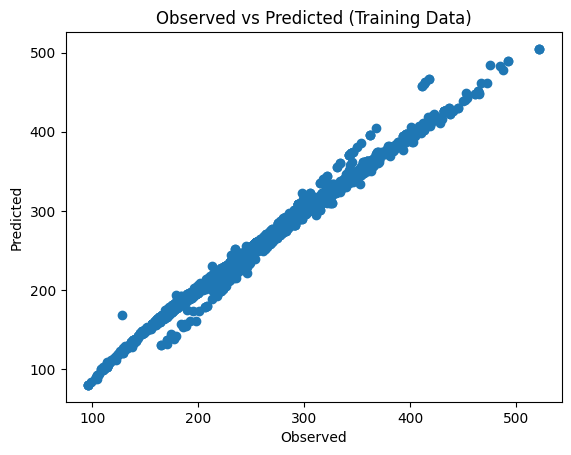

In [19]:
plt.scatter(y_train, y_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted (Training Data)')
plt.show()

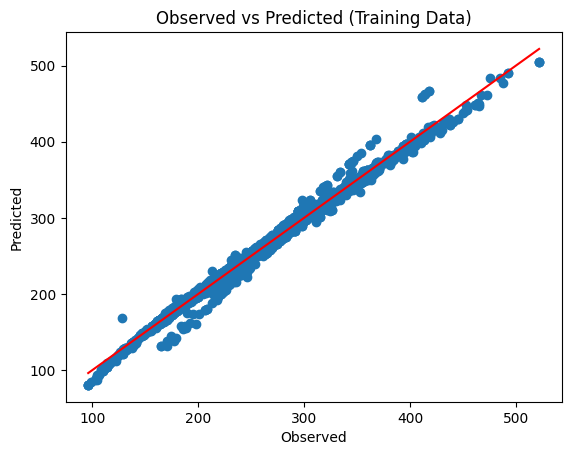

In [20]:
plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')  # Fit line
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted (Training Data)')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_train,y_pred)
MSE = mean_squared_error(y_train,y_pred)
MAE

2.958902960424611

In [28]:
MSE

24.247691240829795

In [29]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
rmse

4.9241944763412615